1. Introduction – The Problem We Want to Solve

Music is a dynamic industry where trends change rapidly. The emerging music agency we represent wants to effectively select artists and repertoires based on actual data on song popularity.

I intend to determine which song characteristics influence chart popularity in different countries.


In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading and Initial Data Exploration:


2.1. Loading the files



In [202]:
final = pd.read_csv('Final database.csv', low_memory=False)

In [7]:
popularity = pd.read_csv('Database to calculate popularity.csv', low_memory=False)

2.2. Previewing the first few rows


In [204]:
final.head()


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [205]:
popularity.head()

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber


2.3. Checking data types


In [206]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB


In [207]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807001 entries, 0 to 9807000
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   country     object 
 2   date        object 
 3   position    float64
 4   uri         object 
 5   track       object 
 6   title       object 
 7   artist      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 598.6+ MB


2.4. Basic statistics

In [208]:
final.describe()

,Popularity,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,...,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy
count,170633.000000,167411.000000,167411.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,...,170633.00000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000
mean,5417.616264,1337.530228,0.845667,0.651287,0.348684,0.549149,0.015026,0.435795,0.001242,0.011621,...,0.02513,0.040848,0.045044,0.044505,0.019721,0.038328,0.038943,89.926738,0.087035,0.294843
std,13115.854526,2453.554101,0.361269,0.476564,0.476555,0.497580,0.121658,0.495862,0.035226,0.107175,...,0.15652,0.197938,0.207401,0.206215,0.139039,0.191987,0.193460,57.998729,0.281887,0.455974
min,0.800000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,77.600000,428.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,515.150000,834.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000
75%,3867.850000,1240.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138.000000,0.000000,1.000000
max,233766.900000,44128.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000,1.000000


In [209]:
popularity.describe()

,Unnamed: 0,position
count,9.807001e+06,9.807000e+06
mean,4.903500e+06,1.005000e+02
std,2.831037e+06,5.773431e+01
min,0.000000e+00,1.000000e+00
25%,2.451750e+06,5.075000e+01
50%,4.903500e+06,1.005000e+02
75%,7.355250e+06,1.502500e+02
max,9.807000e+06,2.000000e+02


2.5. Checking for missing values

In [210]:
final.isnull().sum()

Country        0
Uri            0
Popularity     0
Title          0
Artist         0
              ..
USA            0
Popu_max       0
Top10_dummy    0
Top50_dummy    0
Cluster        0
Length: 151, dtype: int64

In [211]:
popularity.isnull().sum()  ## w tej bazie dancyh znajdują się dosyć znaczne braki artystów

Unnamed: 0        0
country           1
date              1
position          1
uri               1
track             1
title             1
artist        15642
dtype: int64

There are quite a few missing artist entries in this dataset.
I look at the rows where artist names are missing — I see the data is incomplete, so I decide to delete these rows (they account for about 0.1%).

In [8]:
popularity[popularity['artist'].isnull()]

,Unnamed: 0,country,date,position,uri,track,title,artist
176000,176000,Global,09/06/2018,1.0,N\A,N\A,N\A,NaN
176001,176001,Global,09/06/2018,2.0,N\A,N\A,N\A,NaN
176002,176002,Global,09/06/2018,3.0,N\A,N\A,N\A,NaN
176003,176003,Global,09/06/2018,4.0,N\A,N\A,N\A,NaN
176004,176004,Global,09/06/2018,5.0,N\A,N\A,N\A,NaN
...,...,...,...,...,...,...,...,...
9790996,9790996,Taiwan,23/03/2017,197.0,N\A,N\A,N\A,NaN
9790997,9790997,Taiwan,23/03/2017,198.0,N\A,N\A,N\A,NaN
9790998,9790998,Taiwan,23/03/2017,199.0,N\A,N\A,N\A,NaN
9790999,9790999,Taiwan,23/03/2017,200.0,N\A,N\A,N\A,NaN


In [9]:
popularity = popularity.dropna(subset=['artist'])

In [ ]:
popularity.isnull().sum()   

Unnamed: 0    0
country       0
date          0
position      0
uri           0
track         0
title         0
artist        0
dtype: int64

I remove the Spotify link column, as it's unnecessary.


In [11]:
popularity = popularity.drop('uri', axis =1)

In [12]:
final = final.drop('Uri', axis = 1)

3. Data Analysis – Checking the Most Popular Artists, Songs, and Genres:

3.1. Which artists appear most frequently in the charts?
Let's find which artists had the most entries in the Top 200:

In [13]:
top_artists = popularity['artist'].value_counts().head(10)


In [14]:
top_artists

artist
Ed Sheeran          218331
Post Malone         109687
Billie Eilish       103108
Drake                83456
XXXTENTACION         81645
Imagine Dragons      75233
Dua Lipa             67698
Ariana Grande        62426
Shawn Mendes         56973
Travis Scott         55124
Name: count, dtype: int64

In [15]:
df_top_artists = pd.DataFrame(data= top_artists)

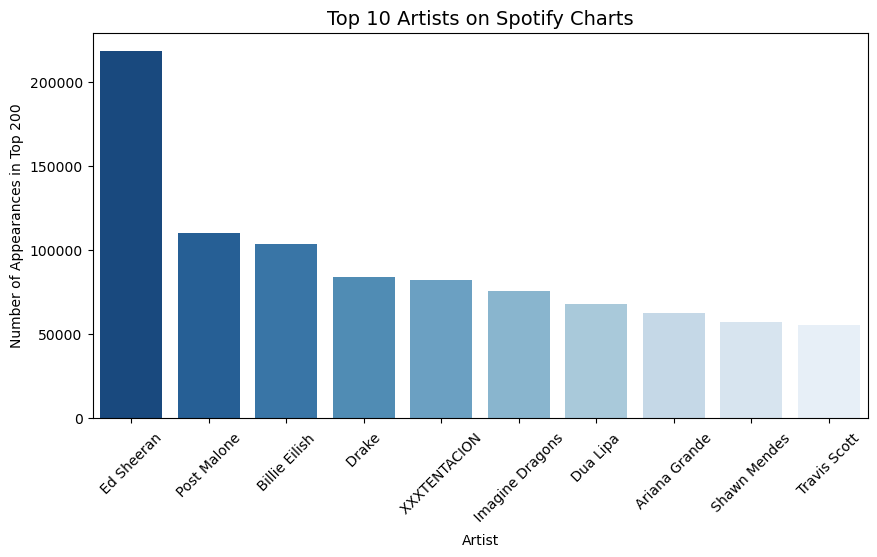

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.index, y=top_artists.values, hue=top_artists.index, palette="Blues_r", legend=False)

plt.title("Top 10 Artists on Spotify Charts", fontsize=14)
plt.ylabel("Number of Appearances in Top 200")
plt.xlabel("Artist")

plt.xticks(rotation=45)


plt.show()

We see that Ed Sheeran is the most popular artist.

3.2. Which songs appeared most frequently?

In [18]:
top_songs = popularity[['title', 'artist']].value_counts().head(10)

In [19]:
top_songs

title                      artist                     
Shape of You               Ed Sheeran                     36312
Believer                   Imagine Dragons                30728
Perfect                    Ed Sheeran                     30042
Say You Won't Let Go       James Arthur                   25411
Shallow                    Lady Gaga, Bradley Cooper      21157
Thunder                    Imagine Dragons                20775
Something Just Like This   The Chainsmokers, Coldplay     19675
New Rules                  Dua Lipa                       19581
Closer                     The Chainsmokers, Halsey       19153
Someone You Loved          Lewis Capaldi                  19092
Name: count, dtype: int64

In [20]:
df_top_songs = pd.DataFrame(data= top_songs)

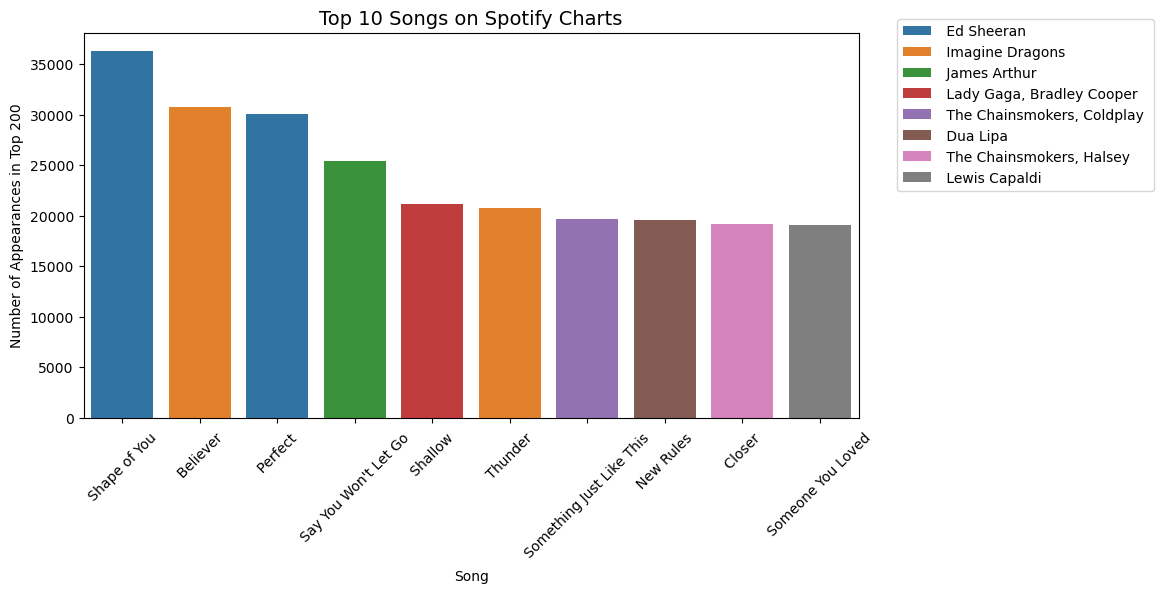

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(data =df_top_songs, x= 'title', y= 'count', hue= 'artist')

plt.title("Top 10 Songs on Spotify Charts", fontsize=14)
plt.ylabel("Number of Appearances in Top 200")
plt.xlabel("Song")

plt.xticks(rotation=45)
plt.legend(loc = (1.05, 0.59))

plt.show()

3.3. What genre appeared most often?

In [22]:
top_genres_count = final['Genre'].value_counts().head(5)
top_genres_count


Genre
dance pop    25351
latin         7591
pop           7146
k-pop         4053
n-a           3952
Name: count, dtype: int64

We see that dance pop is the most frequent genre on the list.

3.4. Which countries are included in the dataset?

In [23]:
print(final['Country'].unique())

['Global' 'USA' 'Argentina' 'Belgium' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Germany' 'Ecuador' 'Spain' 'Italy' 'Mexico' 'Peru'
 'Portugal' 'Taiwan' 'UK' 'Austria' 'Australia' 'Canada' 'Finland'
 'France' 'Indonesia' 'Ireland' 'Malaysia' 'Netherlands' 'Norway'
 'New Zealand' 'Philippines' 'Poland' 'Sweden' 'Singapore' 'Turkey'
 'Brazil' 'Denmark']


Top 10 countries with the most songs:

In [24]:
country_counts = final['Country'].value_counts().head(10)
country_counts


Country
Switzerland    7686
Taiwan         7594
Sweden         6970
Germany        6942
Finland        6783
Netherlands    6697
USA            6645
UK             6540
Austria        6530
France         6449
Name: count, dtype: int64

4. Analyzing Factors Influencing Song Popularity:

4.1. Genre
Let’s see which genre is most listened to in each country:

In [25]:
most_common_genre_per_country = final.groupby("Country")["Genre"].agg(lambda x: x.value_counts().idxmax())


print(most_common_genre_per_country)

Country
Argentina                  latin
Australia              dance pop
Austria           german hip hop
Belgium                dance pop
Brazil                 dance pop
Canada                 dance pop
Chile                      latin
Colombia                   latin
Costa Rica                 latin
Denmark           danish hip hop
Ecuador                    latin
Finland        finnish dance pop
France                 francoton
Germany           german hip hop
Global                 dance pop
Indonesia              dance pop
Ireland                dance pop
Italy            italian hip hop
Malaysia               dance pop
Mexico                     latin
Netherlands        dutch hip hop
New Zealand            dance pop
Norway                 dance pop
Peru                       latin
Philippines            dance pop
Poland            polish hip hop
Portugal               dance pop
Singapore              dance pop
Spain                      latin
Sweden                 dance pop
Sw

Let’s see which genre is the most popular (not just most common) in each country, based on average popularity:

In [26]:
most_popular_genre_per_country = final.groupby(["Country", "Genre"])["Popularity"].mean().reset_index()

most_popular_genre_per_country = round((most_popular_genre_per_country.loc[most_popular_genre_per_country.groupby("Country")["Popularity"].idxmax()]),1)
most_popular_genre_per_country

,Country,Genre,Popularity
21,Argentina,australian pop,72480.1
348,Australia,sad rap,52556.3
631,Austria,sad rap,33787.2
778,Belgium,dutch cabaret,60131.8
1059,Brazil,sad rap,29823.9
1290,Canada,sad rap,51644.7
1320,Chile,australian pop,59980.4
1600,Colombia,panamanian pop,30996.1
1783,Costa Rica,reggaeton colombiano,50214.3
2007,Denmark,sad rap,30288.8


As we can see, the most popular songs tend to belong to different genres than those that are most frequently played.
So, overall — what is the most popular genre globally?
We exclude the "Global" country entry because now we're focusing on worldwide popularity:

In [27]:
genre_popularity = most_popular_genre_per_country.groupby("Genre")["Popularity"].sum().sort_values(ascending=False)
genre_popularity

Genre
sad rap                 656365.5
australian pop          194345.0
indie rock              162227.4
chicago house           108324.1
neo soul                 67671.0
alternative rock         62315.4
israeli pop              62015.9
dutch cabaret            60131.8
indie rockism            50332.8
reggaeton colombiano     50214.3
alternative pop rock     45230.4
nz pop                   35327.3
panamanian pop           30996.1
circuit                  30150.6
Name: Popularity, dtype: float64

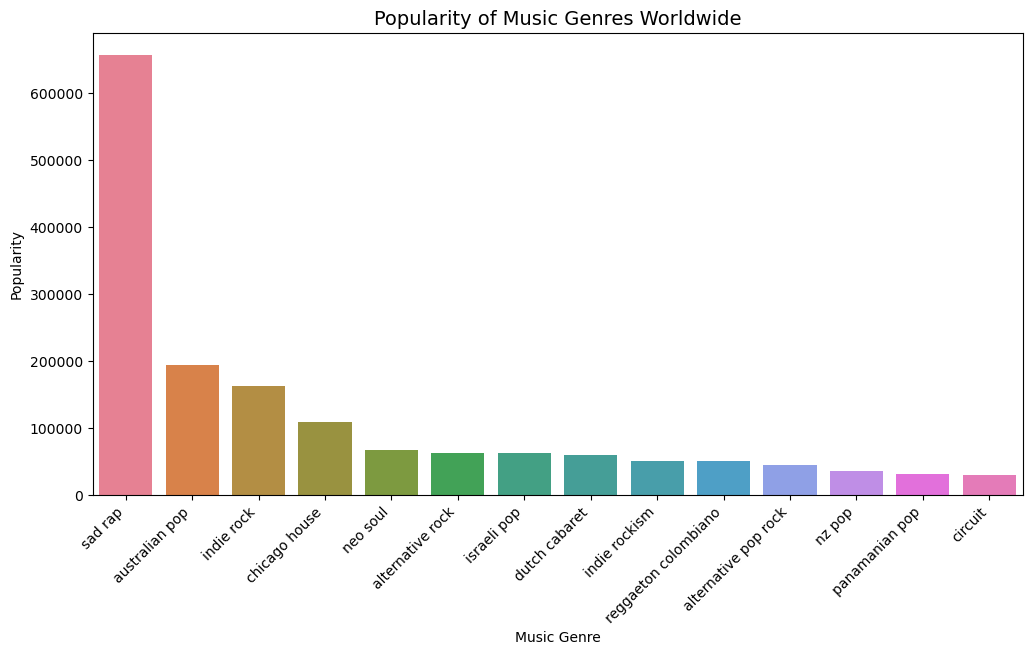

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_popularity.reset_index(), x="Genre", y="Popularity", hue="Genre", dodge=False)
plt.title("Popularity of Music Genres Worldwide", fontsize=14)
plt.ylabel("Popularity")
plt.xlabel("Music Genre")

plt.xticks(rotation=45, ha="right")
plt.show()

4.2. Song Attributes

Let’s check which features influence whether a song becomes popular. We examine correlations:

In [29]:
popular_aspects = final.groupby(['speechiness','loudness','duration_ms','energy','danceability','valence','tempo','trust_norm2','fear_norm2','anticipation_norm2','disgust_norm2','anger_norm2', 'joy_norm2', 'sadness_norm2'])["Popularity"].mean().reset_index().sort_values(by='Popularity', ascending=False).head(10)

final_corr = popular_aspects.corr()
final_corr


,speechiness,loudness,duration_ms,energy,danceability,valence,tempo,trust_norm2,fear_norm2,anticipation_norm2,disgust_norm2,anger_norm2,joy_norm2,sadness_norm2,Popularity
speechiness,1.000000,-0.282482,-0.138053,0.159940,-0.289863,-0.098515,0.218147,0.285893,-0.116568,-0.315955,0.124920,-0.077806,-0.337908,0.349120,-0.338030
loudness,-0.282482,1.000000,0.292320,0.787167,0.243863,0.285554,-0.248338,-0.017617,0.097326,-0.085896,0.011014,0.173488,-0.028544,0.048870,0.493738
duration_ms,-0.138053,0.292320,1.000000,-0.019601,0.031361,-0.572295,-0.608796,0.228676,-0.446425,0.360820,-0.433013,-0.328339,0.092585,-0.033932,0.278677
energy,0.159940,0.787167,-0.019601,1.000000,-0.053224,0.272921,0.096579,0.177412,0.250482,-0.470920,0.075163,0.296222,-0.364746,0.391475,0.130513
danceability,-0.289863,0.243863,0.031361,-0.053224,1.000000,0.402282,0.034641,-0.241166,0.390931,0.111460,0.301334,0.171164,-0.244800,0.243247,0.600237
valence,-0.098515,0.285554,-0.572295,0.272921,0.402282,1.000000,0.273096,-0.433766,0.436884,-0.270687,0.672935,0.491038,-0.224288,0.082421,0.576359
tempo,0.218147,-0.248338,-0.608796,0.096579,0.034641,0.273096,1.000000,-0.186051,0.536530,-0.662100,0.630222,0.757662,-0.404190,0.405139,-0.264310
trust_norm2,0.285893,-0.017617,0.228676,0.177412,-0.241166,-0.433766,-0.186051,1.000000,-0.640452,-0.418044,-0.668301,-0.561521,-0.158147,0.185447,-0.163513
fear_norm2,-0.116568,0.097326,-0.446425,0.250482,0.390931,0.436884,0.536530,-0.640452,1.000000,-0.077279,0.628237,0.720332,-0.430501,0.458541,-0.035605
anticipation_norm2,-0.315955,-0.085896,0.360820,-0.470920,0.111460,-0.270687,-0.662100,-0.418044,-0.077279,1.000000,-0.317055,-0.465561,0.631768,-0.587577,0.052831


<Axes: title={'center': 'Correlation Between Song Features and Popularity'}>

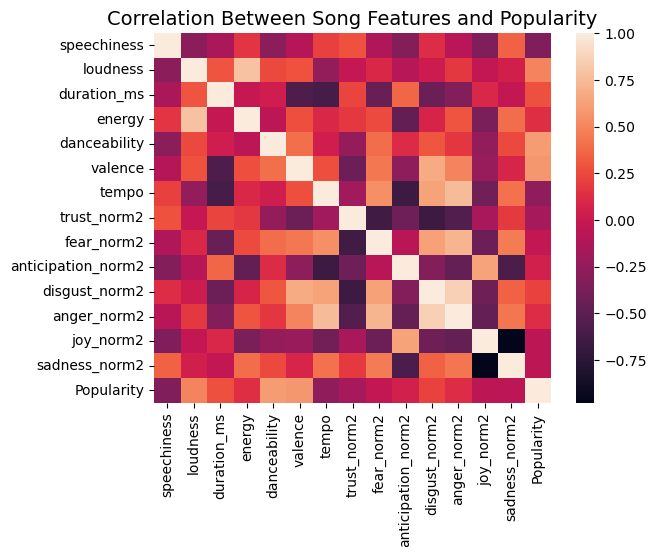

In [32]:
plt.title("Correlation Between Song Features and Popularity", fontsize=14)

sns.heatmap(final_corr)

We look at the brightest or darkest squares.
We see that danceability and valence (positivity/mood) have the strongest positive correlations. This means people enjoy songs that are more danceable and have a more positive mood.
The strongest negative correlations are with speechiness (wordiness) and tempo. This suggests people prefer songs that have fewer words and a slower tempo.
Interestingly, people also seem to prefer songs with more aggressive language (disgust, anger) over joyful or trusting ones.

5. Conclusions:

To choose the right musical acts that will gain popularity, we need to consider which country will be targeted — different genres dominate in different countries.
If we want to design how the songs should sound, we should look at the correlation heatmap of song attributes, where we can see which features most influence a song's popularity.